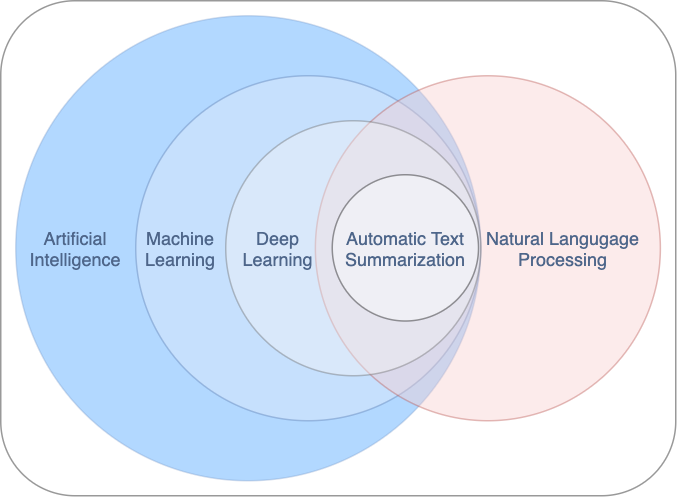

**Build an AI Text Summarizer in Under 30 Lines of Python**


**Before we can get started with the code we need to install spaCy and download a model. We can do this in the terminal with the following two commands. The en_core_web_sm model is the smallest model and the fastest to get started with. You can also download en_core_web_md, en_core_web_lg, and en_core_web_trf for other, larger English language models.**



In [ ]:
!pip install spacy

**Let’s get started with the code for our text summarizer! First, we’ll import spacy and load up the language model we downloaded earlier.**

**import text summarizer library and model**


In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")



**For this tutorial, we’ll be building a simple extractive text summarizer based purely on the words in the text and how often they’re mentioned. We’re going to break down this text summarizer into a few simple steps.**

**First we’re going to create a word dictionary to keep track of word count. Then we’re going to score each sentence based on how often each word in that sentence appears. After that, we’re going to sort the sentences based on their score. Finally, we’ll take the top three scoring sentences and return them in the same order they originally appeared in the text.**

**Before we get into all that let’s load up our text and turn it into a spaCy Document. You can use whatever text you want. The text provided is just an example that talks about me and this blog.**



**text summarizer - example text**


In [15]:
# extractive summary by word count
text = """This is an example text. We will use seven sentences and we will return 3. This blog is written by kishore Tang. kishore is the best software content creator. This is a software content blog focused on Python, your software career, and Machine Learning. kishore's favorite ML subcategory is Natural Language Processing. This is the end of our example."""
# tokenize
doc = nlp(text)


**Getting All the Word Counts**

**Now that we have our text in Doc form, we can get all our word counts. You can actually do this before by splitting the string on spaces, but this is easier and we’ll need the Doc again later anyway.**

**First let’s create a word dictionary. Next, we’ll loop through the text and check if each word is in the dictionary. If the word is in the dictionary we’ll increment its counter, if not we’ll set its counter to one. We’ll save every word in lowercase format.**




**create a word dictionary for the ai text summarizer**


In [20]:
# create dictionary
word_dict = {}
# loop through every sentence and give it a weight
for word in doc:
    word = word.text.lower()
    if word in word_dict:
        word_dict[word] += 1
    else:
        word_dict[word] = 1


**Scoring the Sentences for Our AI Text Summarizer**


**Once we’ve gathered all the word counts, we can use those to score our sentences. We’ll create a list of tuples. Each tuple contains information we need about the sentence – the sentences text, the sentences score, and the original sentence index. We’ll loop through each index and sentence in the enumerated Doc sentences.**

**The enumerate command returns an index and the element at that index for any iterable. For each word in the sentence, we’ll add the word score to the sentence score. At the end of looping through all the words in the sentence, we append the sentence text, the sentence score normalized by length, and the original index.**



**score each sentence for the text summarizer**


In [21]:
# create a list of tuple (sentence text, score, index)
sents = []
# score sentences
sent_score = 0
for index, sent in enumerate(doc.sents):
    for word in sent:
        word = word.text.lower()
        sent_score += word_dict[word]
    sents.append((sent.text.replace("\n", " "), sent_score/len(sent), index))


**Sorting the Sentences for the Text Summarizer**

**Now that our list of sentences is created, we’ll have to sort them so that we get the highest scored sentences in our summary. First we’ll use a lambda function to sort by the negative version of the score.**

**Why negative? Because the automatic sort function sorts from smallest to largest. After we’ve sorted by score, we take the top 3 and then re-sort those by index so that our summary is in order. You can take however many sentences you’d like and even change the number of sentences you want based on the length of the text.**



**find the most important sentences for the text summarizer**


In [22]:
# sort sentence by word occurrences
sents = sorted(sents, key=lambda x: -x[1])
# return top 3
sents = sorted(sents[:3], key=lambda x: x[2])


**Returning the Summary**

**All we have to do to get our resulting summary is take the list of sorted sentences and put them together, separated by a space. Finally, we’ll print it out to take a look.**



**text summarization python**


In [24]:
# compile them into text
summary_text = ""
for sent in sents:
    summary_text += sent[0] + " "
 
print(summary_text)
#Once we run our program, we should see an example like the one below. That’s all there is to building a simple text summarizer in Python with spaCy!



kishore is the best software content creator. kishore's favorite ML subcategory is Natural Language Processing. This is the end of our example. 
